In [1]:
cd /g/data/jk72/deg581/apom/ana/notebooks

/g/data/jk72/deg581/apom/ana/notebooks


In [2]:
# load modules
## Data processing and DA modules
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
## Dealing with big data and netcdf
import xarray as xr
from netCDF4 import Dataset
## ROMS packages
from xgcm import Grid
## color maps
import cmaps
import cmocean
## mapping packages
import cartopy.crs as ccrs
import cartopy.feature as cfeature
## System tools and python configuration
import os
import glob
import repackage
repackage.add('../../')
repackage.add('../')

'/jobfs/113393973.gadi-pbs'

In [3]:
# Suite for Analysis - Overview

# script needs to:
# load 1-5 variables from multiple files
# run some calculation and concatenate together
# make some plots

In [4]:


FilePath='/g/data/jk72/deg581/apom/mdl/amery_hr_repeatyear_v11_ctrl/' # Truth file settings
prefix='roms_his_'
timeRange = [1, 20]
datelist = np.array(range(timeRange[0],timeRange[1],1))

def add_zeros_to_4(date):
    if date<10:
        to_add = '000'
    elif date>9 & date<100:
        to_add = '00'
    elif date>99 & date < 1000:
        to_add = '0'
    else: 
        to_add = ''
    return to_add

def generateFileList(FilePath,prefix,datelist):
    filelist=[FilePath+prefix+add_zeros_to_4(datelist[0])+str(datelist[0])+'.nc']
    for dates in datelist[1:]:
        filenameToAppend=FilePath+prefix+add_zeros_to_4(dates)+str(dates)+'.nc'
        filelist.append(filenameToAppend)
    return filelist

fl=generateFileList(FilePath,prefix,datelist)
print(fl)

# ds=loadOverlappedNetcdfFileList(filelist=fl,overlapDays=7)

ds = xr.open_mfdataset(fl,chunks = {'ocean_time':1}, data_vars='minimal', compat='override',coords='minimal',parallel='False',join='right')

print(ds.nbytes/1e9,'G')

['/g/data/jk72/deg581/apom/mdl/amery_hr_repeatyear_v11_ctrl/roms_his_0001.nc', '/g/data/jk72/deg581/apom/mdl/amery_hr_repeatyear_v11_ctrl/roms_his_0002.nc', '/g/data/jk72/deg581/apom/mdl/amery_hr_repeatyear_v11_ctrl/roms_his_0003.nc', '/g/data/jk72/deg581/apom/mdl/amery_hr_repeatyear_v11_ctrl/roms_his_0004.nc', '/g/data/jk72/deg581/apom/mdl/amery_hr_repeatyear_v11_ctrl/roms_his_0005.nc', '/g/data/jk72/deg581/apom/mdl/amery_hr_repeatyear_v11_ctrl/roms_his_0006.nc', '/g/data/jk72/deg581/apom/mdl/amery_hr_repeatyear_v11_ctrl/roms_his_0007.nc', '/g/data/jk72/deg581/apom/mdl/amery_hr_repeatyear_v11_ctrl/roms_his_0008.nc', '/g/data/jk72/deg581/apom/mdl/amery_hr_repeatyear_v11_ctrl/roms_his_0009.nc', '/g/data/jk72/deg581/apom/mdl/amery_hr_repeatyear_v11_ctrl/roms_his_0010.nc', '/g/data/jk72/deg581/apom/mdl/amery_hr_repeatyear_v11_ctrl/roms_his_0011.nc', '/g/data/jk72/deg581/apom/mdl/amery_hr_repeatyear_v11_ctrl/roms_his_0012.nc', '/g/data/jk72/deg581/apom/mdl/amery_hr_repeatyear_v11_ctrl/roms

In [5]:
ds = ds.drop_vars(['rho','u','v','Tb','Sb','u_eastward','v_northward','ubar_eastward','vbar_northward','w','salt','shflux','ssflux','sustr','svstr'])
print(ds.nbytes/1e9,'G')
ds

618.094777984 G


<xarray.Dataset>
Dimensions:        (tracer: 2, boundary: 4, s_rho: 31, s_w: 32, eta_rho: 750,
                    xi_rho: 900, eta_u: 750, xi_u: 899, eta_v: 749, xi_v: 900,
                    eta_psi: 749, xi_psi: 899, ocean_time: 6936)
Coordinates:
  * s_rho          (s_rho) float64 -0.9839 -0.9516 -0.9194 ... -0.04839 -0.01613
  * s_w            (s_w) float64 -1.0 -0.9677 -0.9355 ... -0.06452 -0.03226 0.0
    x_rho          (eta_rho, xi_rho) float64 dask.array<chunksize=(750, 900), meta=np.ndarray>
    y_rho          (eta_rho, xi_rho) float64 dask.array<chunksize=(750, 900), meta=np.ndarray>
    x_u            (eta_u, xi_u) float64 dask.array<chunksize=(750, 899), meta=np.ndarray>
    y_u            (eta_u, xi_u) float64 dask.array<chunksize=(750, 899), meta=np.ndarray>
    x_v            (eta_v, xi_v) float64 dask.array<chunksize=(749, 900), meta=np.ndarray>
    y_v            (eta_v, xi_v) float64 dask.array<chunksize=(749, 900), meta=np.ndarray>
    x_psi          (eta_psi, xi_psi) float64 dask.array<chunksize=(749, 899), meta=np.ndarray>
    y_psi          (eta_psi, xi_psi) float64 dask.array<chunksize=(749, 899), meta=np.ndarray>
  * ocean_time     (ocean_time) datetime64[ns] 2007-01-01 ... 2025-12-27
Dimensions without coordinates: tracer, boundary, eta_rho, xi_rho, eta_u, xi_u,
                                eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/73)
    ntimes         int32 ...
    ndtfast        int32 ...
    dt             float64 ...
    dtfast         float64 ...
    dstart         datetime64[ns] ...
    nHIS           int32 ...
    ...             ...
    mask_u         (eta_u, xi_u) float64 dask.array<chunksize=(750, 899), meta=np.ndarray>
    mask_v         (eta_v, xi_v) float64 dask.array<chunksize=(749, 900), meta=np.ndarray>
    mask_psi       (eta_psi, xi_psi) float64 dask.array<chunksize=(749, 899), meta=np.ndarray>
    m              (ocean_time, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 750, 900), meta=np.ndarray>
    zeta           (ocean_time, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 750, 900), meta=np.ndarray>
    temp           (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 31, 750, 900), meta=np.ndarray>
Attributes: (12/34)
    file:              roms_his_0001.nc
    format:            netCDF-3 64bit offset file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS history file
    title:             Amery Ice Shelf-ocean Application
    var_info:          ROMS/External/varinfo.yaml
    ...                ...
    compiler_command:  /apps/openmpi/4.0.2/bin/mpif90
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3 -traceback -che...
    tiling:            020x024
    history:           ROMS/TOMS, Version 4.1, Thursday - March 14, 2024 -  9...
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_in...
    CPP_options:       AMERY, ANA_BSFLUX, ANA_BTFLUX, ANA_INITIAL, ANA_SRFLUX...

In [6]:
ds

<xarray.Dataset>
Dimensions:        (tracer: 2, boundary: 4, s_rho: 31, s_w: 32, eta_rho: 750,
                    xi_rho: 900, eta_u: 750, xi_u: 899, eta_v: 749, xi_v: 900,
                    eta_psi: 749, xi_psi: 899, ocean_time: 6936)
Coordinates:
  * s_rho          (s_rho) float64 -0.9839 -0.9516 -0.9194 ... -0.04839 -0.01613
  * s_w            (s_w) float64 -1.0 -0.9677 -0.9355 ... -0.06452 -0.03226 0.0
    x_rho          (eta_rho, xi_rho) float64 dask.array<chunksize=(750, 900), meta=np.ndarray>
    y_rho          (eta_rho, xi_rho) float64 dask.array<chunksize=(750, 900), meta=np.ndarray>
    x_u            (eta_u, xi_u) float64 dask.array<chunksize=(750, 899), meta=np.ndarray>
    y_u            (eta_u, xi_u) float64 dask.array<chunksize=(750, 899), meta=np.ndarray>
    x_v            (eta_v, xi_v) float64 dask.array<chunksize=(749, 900), meta=np.ndarray>
    y_v            (eta_v, xi_v) float64 dask.array<chunksize=(749, 900), meta=np.ndarray>
    x_psi          (eta_psi, xi_psi) float64 dask.array<chunksize=(749, 899), meta=np.ndarray>
    y_psi          (eta_psi, xi_psi) float64 dask.array<chunksize=(749, 899), meta=np.ndarray>
  * ocean_time     (ocean_time) datetime64[ns] 2007-01-01 ... 2025-12-27
Dimensions without coordinates: tracer, boundary, eta_rho, xi_rho, eta_u, xi_u,
                                eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/73)
    ntimes         int32 ...
    ndtfast        int32 ...
    dt             float64 ...
    dtfast         float64 ...
    dstart         datetime64[ns] ...
    nHIS           int32 ...
    ...             ...
    mask_u         (eta_u, xi_u) float64 dask.array<chunksize=(750, 899), meta=np.ndarray>
    mask_v         (eta_v, xi_v) float64 dask.array<chunksize=(749, 900), meta=np.ndarray>
    mask_psi       (eta_psi, xi_psi) float64 dask.array<chunksize=(749, 899), meta=np.ndarray>
    m              (ocean_time, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 750, 900), meta=np.ndarray>
    zeta           (ocean_time, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 750, 900), meta=np.ndarray>
    temp           (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 31, 750, 900), meta=np.ndarray>
Attributes: (12/34)
    file:              roms_his_0001.nc
    format:            netCDF-3 64bit offset file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS history file
    title:             Amery Ice Shelf-ocean Application
    var_info:          ROMS/External/varinfo.yaml
    ...                ...
    compiler_command:  /apps/openmpi/4.0.2/bin/mpif90
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3 -traceback -che...
    tiling:            020x024
    history:           ROMS/TOMS, Version 4.1, Thursday - March 14, 2024 -  9...
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_in...
    CPP_options:       AMERY, ANA_BSFLUX, ANA_BTFLUX, ANA_INITIAL, ANA_SRFLUX...

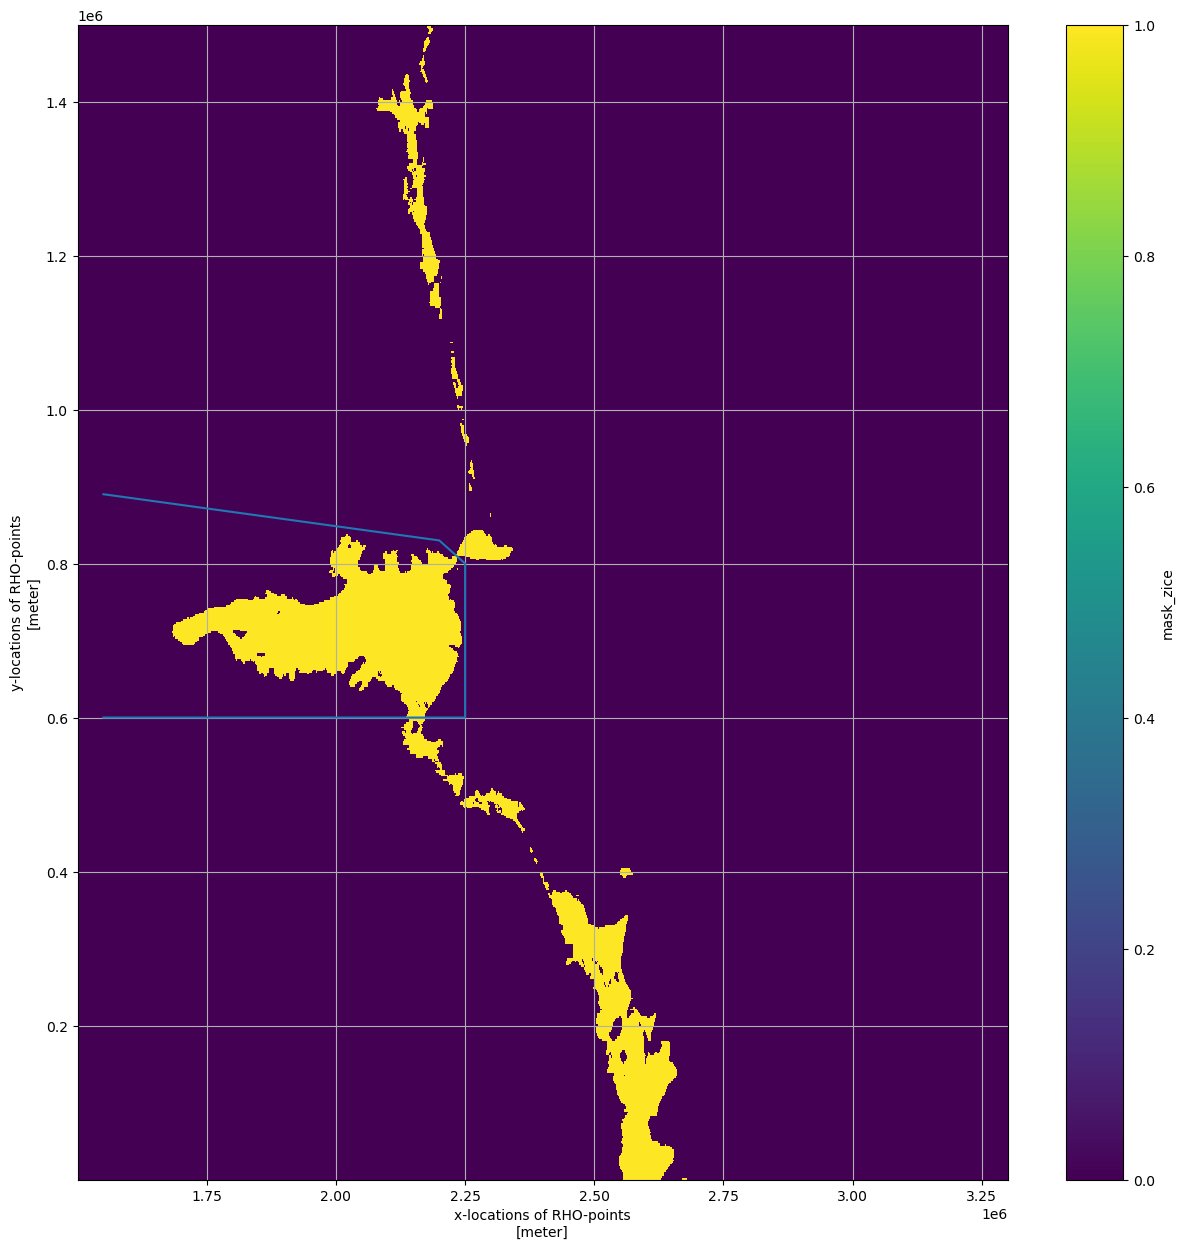

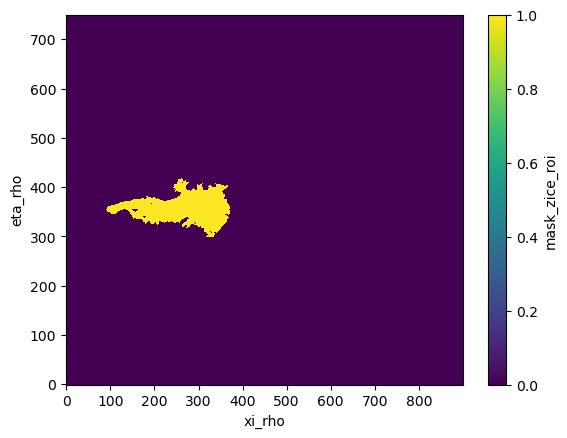

In [7]:
# make masks
ds['mask_zice'] = ((ds.zice<0)*ds.mask_rho)

# now make a ROI mask(s)
plt.figure(figsize=(15,15))
ds.mask_zice.plot(x='x_rho',y='y_rho')
plt.grid()
poly_shelf = np.array([
    [1.55e6,600000],
    [2.25e6,600000],
    [2.25e6,800000],
    [2.20e6,830000],
    [1.55e6,890000]])
plt.plot(poly_shelf[:,0],poly_shelf[:,1])
plt.show()

def inpolygon(xq, yq, xv, yv):
    from matplotlib import path
    shape = xq.shape
    xq = xq.reshape(-1)
    yq = yq.reshape(-1)
    xv = xv.reshape(-1)
    yv = yv.reshape(-1)
    q = [(xq[i], yq[i]) for i in range(xq.shape[0])]
    p = path.Path([(xv[i], yv[i]) for i in range(xv.shape[0])])
    return p.contains_points(q).reshape(shape)


mask_roi = inpolygon(ds.x_rho.values, ds.y_rho.values,poly_shelf[:,0], poly_shelf[:,1])


ds['mask_zice_roi'] = ds.mask_zice*mask_roi
ds.mask_zice_roi.plot()
roi_label1 = 'amery'
ds.mask_zice_roi.attrs['long_name']=roi_label1

In [8]:
# set any grid data here.

weights = (1/ds.pm)*(1/ds.pn)
weights.name = "weights"

print('making vertical coordinates')
Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
z_rho = ds.zice + (ds.zice + ds.h) * Zo_rho
Zo_w = (ds.hc * ds.s_w + ds.Cs_w * ds.h) / (ds.hc + ds.h)
z_w = Zo_w * (ds.zice + ds.h) + ds.zice
    
ds.coords['z_w'] = z_w.where(ds.mask_rho, 0).transpose('s_w', 'eta_rho', 'xi_rho')
# ds.coords['z_rho'] = z_rho.where(ds.mask_rho, 0).transpose('ocean_time', 's_rho', 'eta_rho', 'xi_rho')
ds.coords['z_rho'] = z_rho.where(ds.mask_rho, 0).transpose('s_rho', 'eta_rho', 'xi_rho')
# ds.coords['z_rho0'] = z_rho.mean(dim='ocean_time')
# ds["z_rho0"] = ds.z_rho0.fillna(0)

ds['dz'] = (('s_rho', 'eta_rho', 'xi_rho'),np.diff(ds.z_w,axis=0))



making vertical coordinates


# melt rates

Text(0.5, 1.0, 'initial melt rates')

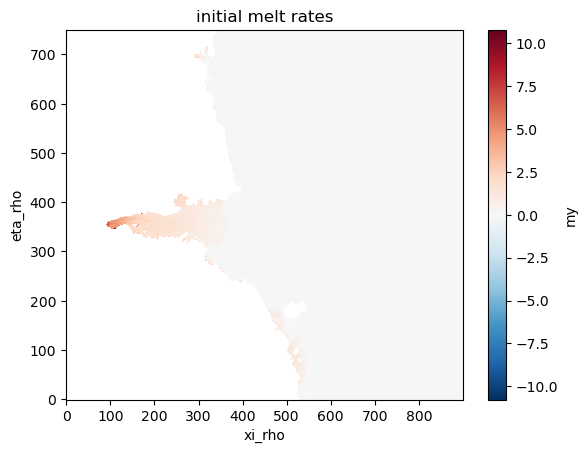

In [9]:
# implement the missing value
ds['m'] = ds.m.where(ds.m<1e35,np.NaN)
ds['my'] = ds.m*(60*60*24*365)

ds.my.isel(ocean_time=0).plot()
plt.title('initial melt rates')

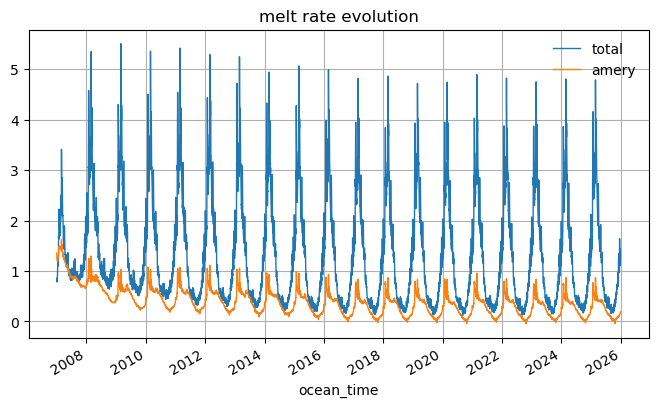

In [10]:
# time evolution of melt rate
plt.figure(figsize=(8,4))
(ds.my*ds.mask_zice.where(ds.mask_zice,np.NaN)).weighted(weights).mean(('eta_rho','xi_rho')).plot(linewidth=1,label='total')
(ds.my*ds.mask_zice_roi.where(ds.mask_zice_roi,np.NaN)).weighted(weights).mean(('eta_rho','xi_rho')).plot(linewidth=1,label=roi_label1)
plt.legend(frameon=False)
plt.title('melt rate evolution')
plt.grid()
plt.show()


Initial melt rates take approximately 5 years to begin to rise, and another 3 years to plateau out. This illustrates the cavity resonance time of ~7-8 years (galton-fenzi 2012). From year 9 onwards, the model is essentially spun up for melt rates. Thus we use model years 2017-2018 (years 10-11) for analysis.


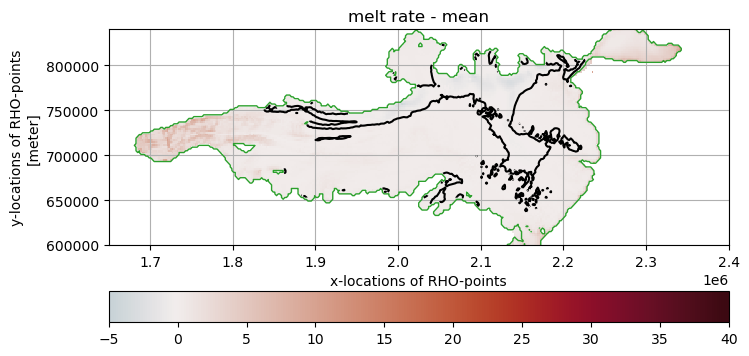

In [11]:
plt.figure(figsize=(8,4))
newcmap = cmocean.tools.crop(cmocean.cm.balance,vmin=-5,vmax=40,pivot=0)
im=(ds.my*ds.mask_zice.where(ds.mask_zice,np.NaN)).sel(ocean_time=slice('2010-01-01','2011-01-01')).mean(dim='ocean_time').plot(x='x_rho',y='y_rho',cmap=newcmap,add_colorbar=False,vmin=-5,vmax=40)
co = plt.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=[-1],colors='C2',linestyles='-',linewidths=1)
# co = plt.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(500,1000,2000),colors='C1',linestyles='-',linewidths=0.5)

co=(ds.my*ds.mask_zice.where(ds.mask_zice,np.NaN)).sel(ocean_time=slice('2010-01-01','2011-01-01')).mean(dim='ocean_time').plot.contour(x='x_rho',y='y_rho',levels=[0],colors='k')
plt.axis((1.65e6,2.4e6,.6e6,.84e6))
plt.title('melt rate - mean')
plt.colorbar(im,orientation='horizontal')
plt.grid()
plt.show()

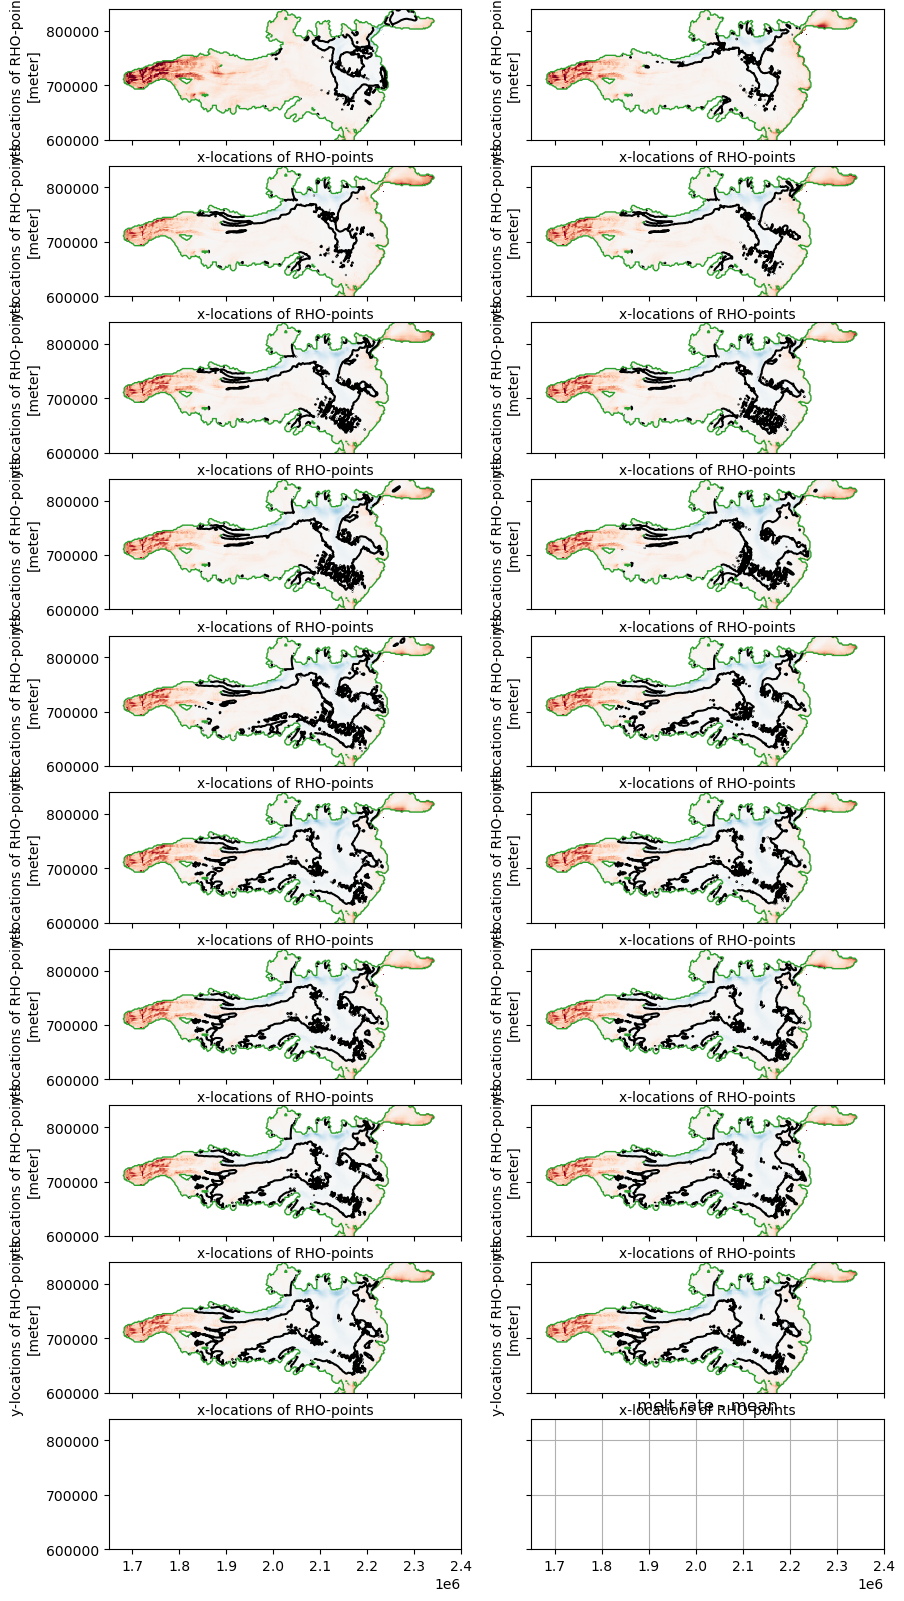

In [15]:
fig, axes = plt.subplots(nrows=10, ncols=2, sharex=True, sharey=True, figsize=(10,20))
newcmap = cmocean.tools.crop(cmocean.cm.balance,vmin=-5,vmax=40,pivot=0)
axes_list = axes.reshape(-1)

year_list = range(2007,2025,1)
ii=0
for year in year_list:
    ax = axes_list[ii]
    
    year_start = str(year)+'-01-01'
    year_end = str(year+1)+'-01-01'
    im=(ds.my*ds.mask_zice.where(ds.mask_zice,np.NaN)).sel(ocean_time=slice(year_start,year_end)).mean(dim='ocean_time').plot(ax=ax,x='x_rho',y='y_rho',cmap='RdBu_r',add_colorbar=False,vmin=-10,vmax=10)
    co = ax.contour(ds.x_rho,ds.y_rho,ds.zice*ds.mask_rho,levels=[-1],colors='C2',linestyles='-',linewidths=1)
    # co = plt.contour(ds.x_rho,ds.y_rho,ds.h*ds.mask_rho,levels=(500,1000,2000),colors='C1',linestyles='-',linewidths=0.5)

    co=(ds.my*ds.mask_zice.where(ds.mask_zice,np.NaN)).sel(ocean_time=slice(year_start,year_end)).mean(dim='ocean_time').plot.contour(ax=ax,x='x_rho',y='y_rho',levels=[0],colors='k')
    ax.axis((1.65e6,2.4e6,.6e6,.84e6))
    ii=ii+1
    
plt.title('melt rate - mean')
# plt.colorbar(im,orientation='horizontal')
plt.grid()
plt.show()


The mean melt rate over these 2 years shows expected values acros much of the cavity, except for a lack of refreezing on the western flanks. This will require more investigation. It may be because of a lack of frazil code or it may be the options driving the model. Noting that in the TotOptions simulation, refreezing was present in this region.


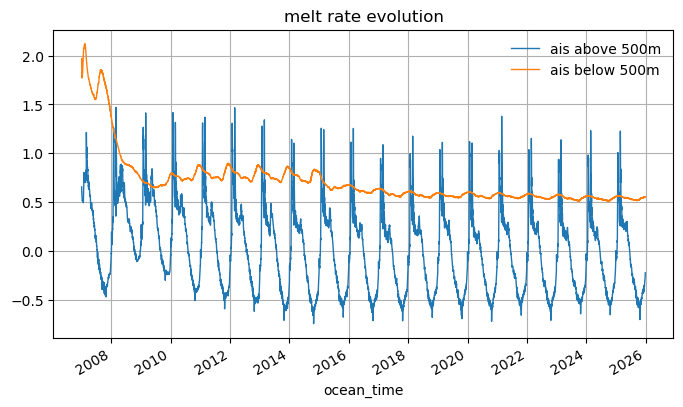

In [13]:
# time evolution of melt rate
plt.figure(figsize=(8,4))
(ds.my*ds.mask_zice_roi.where(ds.mask_zice_roi,np.NaN)).where(ds.zice>-500).weighted(weights).mean(('eta_rho','xi_rho')).plot(linewidth=1,label='ais above 500m')
(ds.my*ds.mask_zice_roi.where(ds.mask_zice_roi,np.NaN)).where(ds.zice<-500).weighted(weights).mean(('eta_rho','xi_rho')).plot(linewidth=1,label='ais below 500m')
plt.legend(frameon=False)
plt.title('melt rate evolution')
plt.grid()
plt.show()


In [14]:
STOP

NameError: name 'STOP' is not defined

# ocean heat content

In [ ]:
# plot heat content
#OHC = rho0*cp0*dV*dT
dV = (1/ds.pm)*(1/ds.pn)*ds.dz
rho0=1026
cp0=4181.3
OHC=1026*4181.3*dV*(ds.temp+273.15)


In [ ]:
# plot total OHC
TotalOHC = OHC.sum(dim='xi_rho').sum(dim='eta_rho').sum(dim='s_rho')
plt.figure(figsize=(8,4))
TotalOHC.plot()
plt.title('Total OHC')
plt.grid()
plt.show()
TotalOHC_above1000 = OHC.where((ds.z_rho>-1000).compute(), drop=True).sum(dim='xi_rho').sum(dim='eta_rho').sum(dim='s_rho')
plt.figure(figsize=(8,4))
TotalOHC_above1000.plot()
plt.title('Total OHC (above 1000m)')
plt.grid()
plt.show()
TotalOHC_below1000 = OHC.where((ds.z_rho<-1000).compute(), drop=True).sum(dim='xi_rho').sum(dim='eta_rho').sum(dim='s_rho')
plt.figure(figsize=(8,4))
TotalOHC_below1000.plot()
plt.title('Total OHC (below 1000m)')
plt.grid()

Ocean heat content is slower to reach a pseudo-steady state. The deep ocean (>1000m depth) takes the full 15 years to begin to approach a steady state, while the top 1000m OHC plateaus within 5 years. Consequrntly, as we're not focussed on deep ocean quantities, the above estimates of 8 year spinup is probably sufficient.

In [ ]:
# plot under ice OHC

TotalOHC_subIce = OHC.where(ds.mask_zice.compute(),drop=True).sum(dim='xi_rho').sum(dim='eta_rho').sum(dim='s_rho')
plt.figure(figsize=(8,4))
TotalOHC_subIce.plot()
plt.title('Total OHC (below ice shelf)')
plt.grid()
TotalOHC_subIce_roi = OHC.where(ds.mask_zice_roi.compute(),drop=True).sum(dim='xi_rho').sum(dim='eta_rho').sum(dim='s_rho')
plt.figure(figsize=(8,4))
TotalOHC_subIce_roi.plot()
plt.title('Total OHC (below Amery Ice Shelf)')
plt.grid()
